<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Quantum Computing and Quantum Machine Learning, Project 1 -->

## Part f)

We introduce now the Lipkin Hamiltonian and study this for the
$3\times 3$ matrix case with total spin $J=1$ and the $5\times 5$
matrix for the $J=2$ case.
We will follow closely the article in the Physical Review C, volume 106, see <https://journals.aps.org/prc/pdf/10.1103/PhysRevC.106.024319>.

The Hamiltonian in second quantization is given by

\begin{equation}
H = H_0 + H_1 +H_2
\end{equation}

with

\begin{equation}
H_0 = \frac{1}{2} \varepsilon \sum_{p\sigma}\sigma a_{p\sigma}^{\dagger}a_{p\sigma}
\end{equation}

and

\begin{equation}
H_1 = \frac{1}{2} V \sum_{p,p',\sigma} a_{p\sigma}^\dagger a_{p'\sigma}^\dagger a_{p'-\sigma} a_{p-\sigma}
\end{equation}

and

\begin{equation}
H_{2} = \frac{1}{2} W \sum_{p,p',\sigma}a_{p\sigma}^\dagger a_{p'-\sigma}^\dagger a_{p'\sigma}a_{p-\sigma}
\end{equation}

We can rewrite this Hamiltonian in terms of the so-called quasispin operators leading to

\begin{equation}
H_0 = \varepsilon J_z
\end{equation}

and

\begin{equation}
H_1 = \frac{1}{2} V \left( J_+^2 + J_-^2 \right)
\end{equation}

\begin{equation}
H_2 = \frac{1}{2} W \left( -N + J_+ J_- + J_- J_+ \right)
\end{equation}

We start here with a simpler case, namely the $J=1$ case and we set $W=0$. Show that Hamiltonian matrix is then given by

\begin{equation}
H_{J = 1} =
\begin{pmatrix}-\epsilon & 0 & -V\\
 0&0&0\\
 -V&0&\epsilon
\end{pmatrix}
\end{equation}

To solve the above hamiltonian problem on a quantum computer we need
to rewrite the Hamiltonian in terms of the Pauli spin
matrices. Rewrite the above $J=1$ Hamiltonian (with $N=2$ particles)
in terms of the Pauli matrices and the identity matrix.

For $J=2$ we have a $5\times 5$ matrix given by

\begin{equation}
H_{J = 2} =
\begin{pmatrix}
-2\varepsilon & 0 & \sqrt{6}V & 0 & 0 \\
0 & -\varepsilon + 3W & 0 & 3V & 0 \\
\sqrt{6}V & 0 & 4W & 0 & \sqrt{6}V \\
0 & 3V & 0 & \varepsilon + 3W & 0 \\
0 & 0 & \sqrt{6}V & 0 & 2\varepsilon
\end{pmatrix}
\end{equation}

Find also the $J=2$ Hamiltonian ($N=4$ particles) in terms of the same matrices (still with $W=0$).

**Challenge:** Set up the Hamiltonian with the $W$ term as well in terms of the Pauli spin matrices.

Diagonalize thereafter, using classical methods, the above Hamiltonian matrices and find the
eigenvalues as functions of the strength of the interaction $V$ while
keeping the single-particle energies fixed. Comment your results. Feel
free to add the Hartree-Fock results as discussed in the lectures.

<span style="color:red">Solution:</span>

**Finding the eigenvalues as functions of the strength of the interaction V for $H_{J = 1}$**

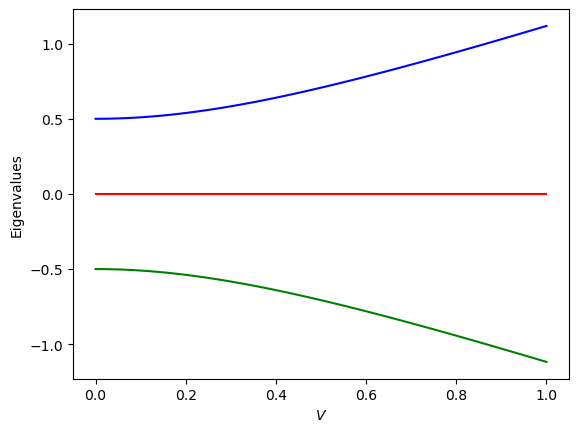

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
           V  Evalues [0]  Evalues [1]  Evalues [2]
0   0.000000    -0.500000          0.0     0.500000
1   0.016949    -0.500287          0.0     0.500287
2   0.033898    -0.501148          0.0     0.501148
3   0.050847    -0.502579          0.0     0.502579
4   0.067797    -0.504575          0.0     0.504575
5   0.084746    -0.507131          0.0     0.507131
6   0.101695    -0.510237          0.0     0.510237
7   0.118644    -0.513884          0.0     0.513884
8   0.135593    -0.518059          0.0     0.518059
9   0.152542    -0.522752          0.0     0.522752
10  0.169492    -0.527946          0.0     0.527946
11  0.186441    -0.533629          0.0     0.533629
12  0.203390    -0.539785          0.0     0.539785
13  0.220339    -0.546397     

In [2]:
from  matplotlib import pyplot as plt
import numpy as np

# Pauli matrix and identity matrix
I = np.array([[1,0],
              [0,1]])
X = np.array([[0,1],
              [1,0]])
Y = np.array([[0,-1j],
              [1j,0]])
Z = np.array([[1,0],
              [0,-1]])

# Hamiltonian non-interacting
E = 0.5                        # play with this value
H0 = np.array([[-E,0,0],
               [0,0,0],
               [0,0,E]])

# Hamiltonian interacting 
H1 = np.array([[0,0,-1],
               [0,0,0],
               [-1,0,0]])

dim = 3
Hamiltonian = np.zeros((dim,dim))

n = 60
V = np.linspace(0.0,1.0,n)
Eigenvalue = np.zeros((dim,n))

# Hamiltonian written in Pauli matrices terms
for i in range(n):
    H = H0 + V[i]*H1
    EigValues, EigVectors = np.linalg.eig(H)
    permute = EigValues.argsort()          
    EigValues = EigValues[permute]        
    EigVectors = EigVectors[:,permute]     
    for j in range(dim):
        Eigenvalue[j,i] = EigValues[j]

plt.plot(V, Eigenvalue[0,:] ,'g-',V, Eigenvalue[1,:],'r-',V, Eigenvalue[2,:],'b-',)
plt.xlabel('$V$')
plt.ylabel('Eigenvalues')
plt.show()
print('------------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------------')
import pandas as pd
from pandas import DataFrame
data ={'V':V, 'Evalues [0]':Eigenvalue[0,:],'Evalues [1]':Eigenvalue[1,:],'Evalues [2]':Eigenvalue[2,:],}
frame = pd.DataFrame(data)
print(frame)
print('Lowest energy =',EigValues[0])

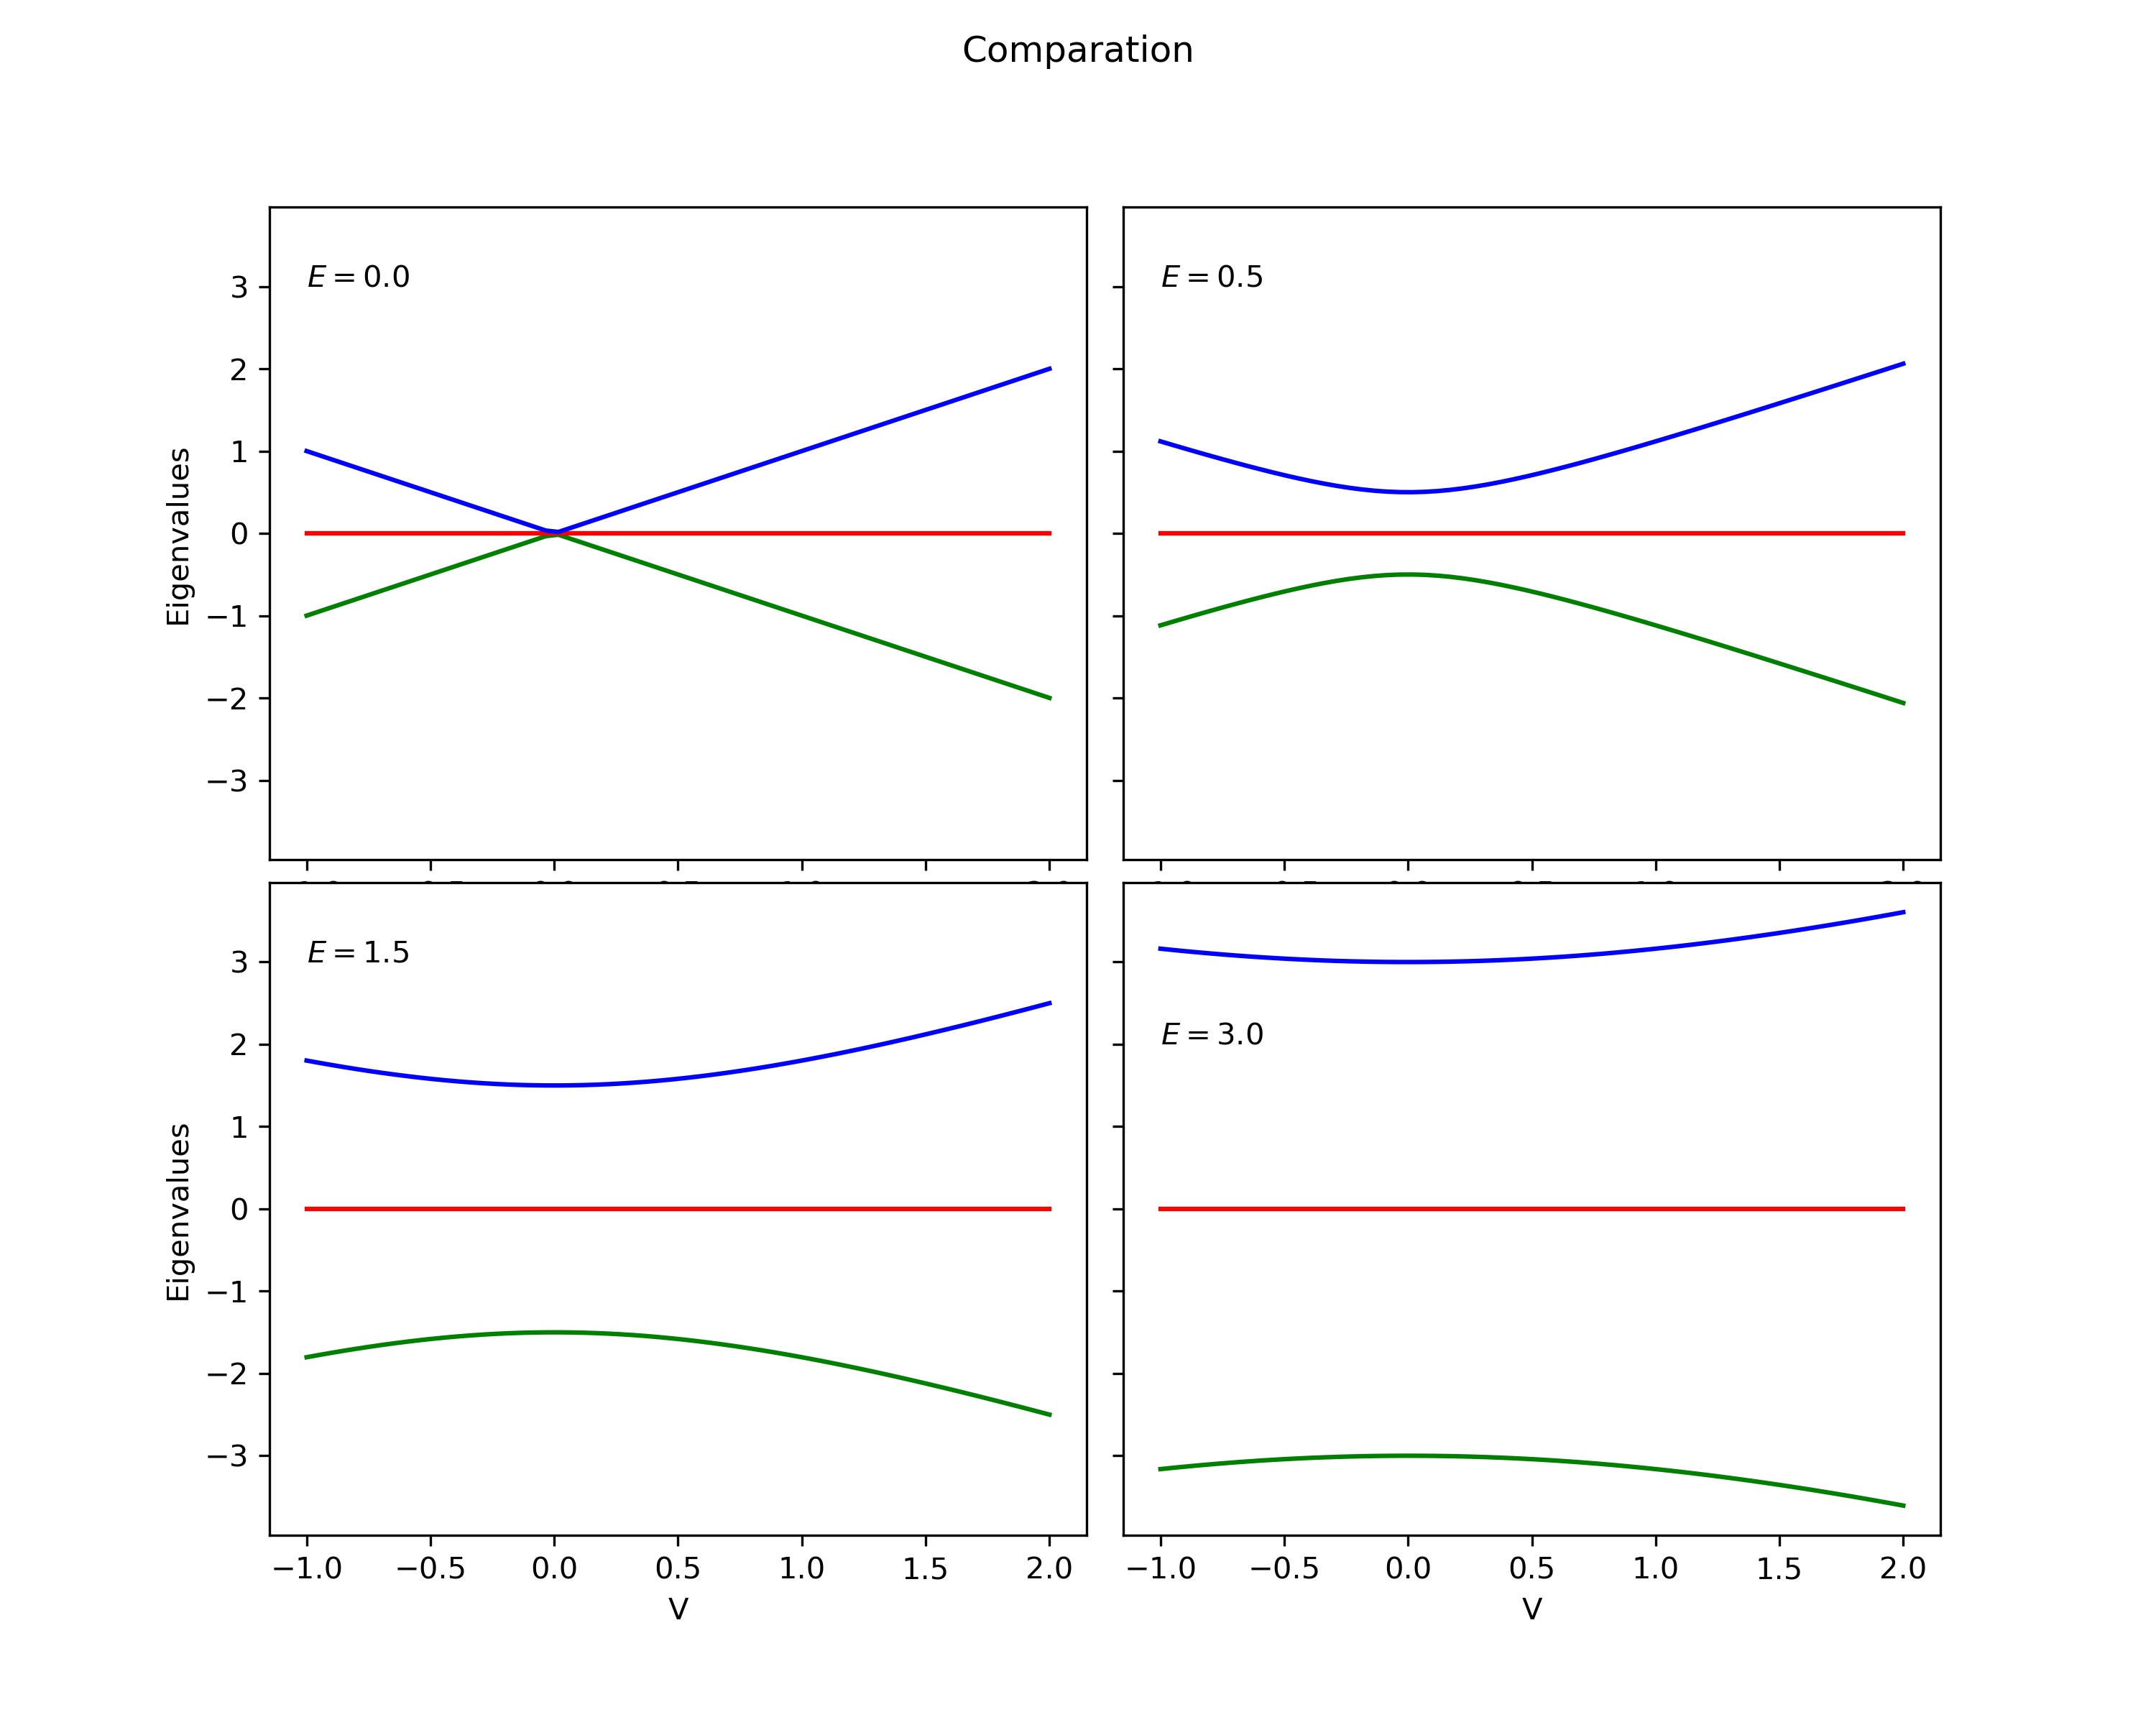

In [3]:
from IPython.display import Image

Image('/../comparation.png', width = 1000)

<span style="color:red">Comment:</span> The entanglement depends of how we define $\epsilon$ and the interaction strenght $V$. For example if we decrease the values for $\epsilon$, the entanglement increase. When $\epsilon = 0$, the entenglament reach the maximal point. On the other hand, when we increase the values for $\epsilon$, the entanglement between states disappears.

**Finding the eigenvalues as functions of the strength of the interaction V for $H_{J = 2}$**

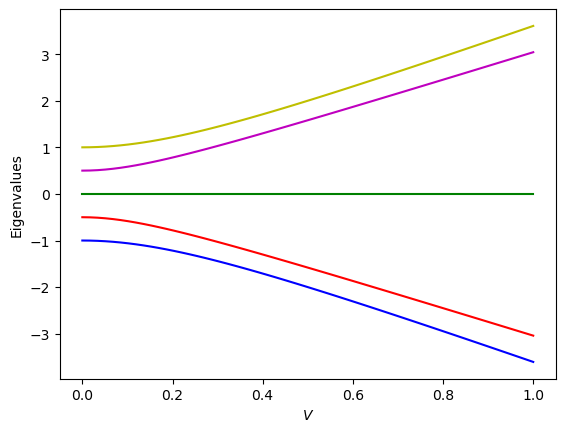

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
           V  Evalues [0]  Evalues [1]   Evalues [2]  Evalues [3]  Evalues [4]
0   0.000000    -1.000000    -0.500000  0.000000e+00     0.500000     1.000000
1   0.016949    -1.001722    -0.502579 -6.132519e-19     0.502579     1.001722
2   0.033898    -1.006871    -0.510237  9.486769e-19     0.510237     1.006871
3   0.050847    -1.015394    -0.522752 -7.724940e-19     0.522752     1.015394
4   0.067797    -1.027208    -0.539785  2.114194e-18     0.539785     1.027208
5   0.084746    -1.042201    -0.560925 -1.431147e-17     0.560925     1.042201
6   0.101695    -1.060237    -0.585727 -1.862117e-17     0.585727     1.060237
7   0.118644    -1.081165    -0.613749  7.589415e-19     0.613749     1.081165
8   0.135593    -1.104820    -0.644569  5.69206

In [5]:
from  matplotlib import pyplot as plt
import numpy as np

# Hamiltonian non-interacting
E = 0.5
H0 = np.array([[-2*E,0,0,0,0],
               [0,-E,0,0,0],
               [0,0,0,0,0],
               [0,0,0,E,0],
               [0,0,0,0,2*E]])

# Hamiltonian interacting 
W = 0.0
H11 = np.array([[0,0,np.sqrt(6),0,0],
               [0,0,0,3,0],
               [np.sqrt(6),0,0,0,np.sqrt(6)],
               [0,3,0,0,0],
               [0,0,np.sqrt(6),0,0]])
H12 = np.array([[0,0,0,0,0],
               [0,3*W,0,0,0],
               [0,0,4*W,0,0],
               [0,0,0,3*W,0],
               [0,0,0,0,0]])
H1 = H11 + H12

dim = 5
Hamiltonian = np.zeros((dim,dim))

n = 60
V = np.linspace(0.0,1.0,n)
Eigenvalue = np.zeros((dim,n))

# Hamiltonian written in Pauli matrices terms
for i in range(n):
    H = H0 + V[i]*H1
    EigValues, EigVectors = np.linalg.eig(H)
    permute = EigValues.argsort()          
    EigValues = EigValues[permute]        
    EigVectors = EigVectors[:,permute]     
    for j in range(dim):
        Eigenvalue[j,i] = EigValues[j]

plt.plot(V, Eigenvalue[0,:] ,'b-',V, Eigenvalue[1,:],'r-',V, Eigenvalue[2,:],'g-',V, Eigenvalue[3,:],'m-',V, Eigenvalue[4,:],'y-',)
plt.xlabel('$V$')
plt.ylabel('Eigenvalues')
plt.show()

print('------------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------------')
import pandas as pd
from pandas import DataFrame
data ={'V':V, 'Evalues [0]':Eigenvalue[0,:],'Evalues [1]':Eigenvalue[1,:],'Evalues [2]':Eigenvalue[2,:],'Evalues [3]':Eigenvalue[3,:],'Evalues [4]':Eigenvalue[4,:],}
frame = pd.DataFrame(data)
print(frame)
print('Lowest energy =',EigValues[0])

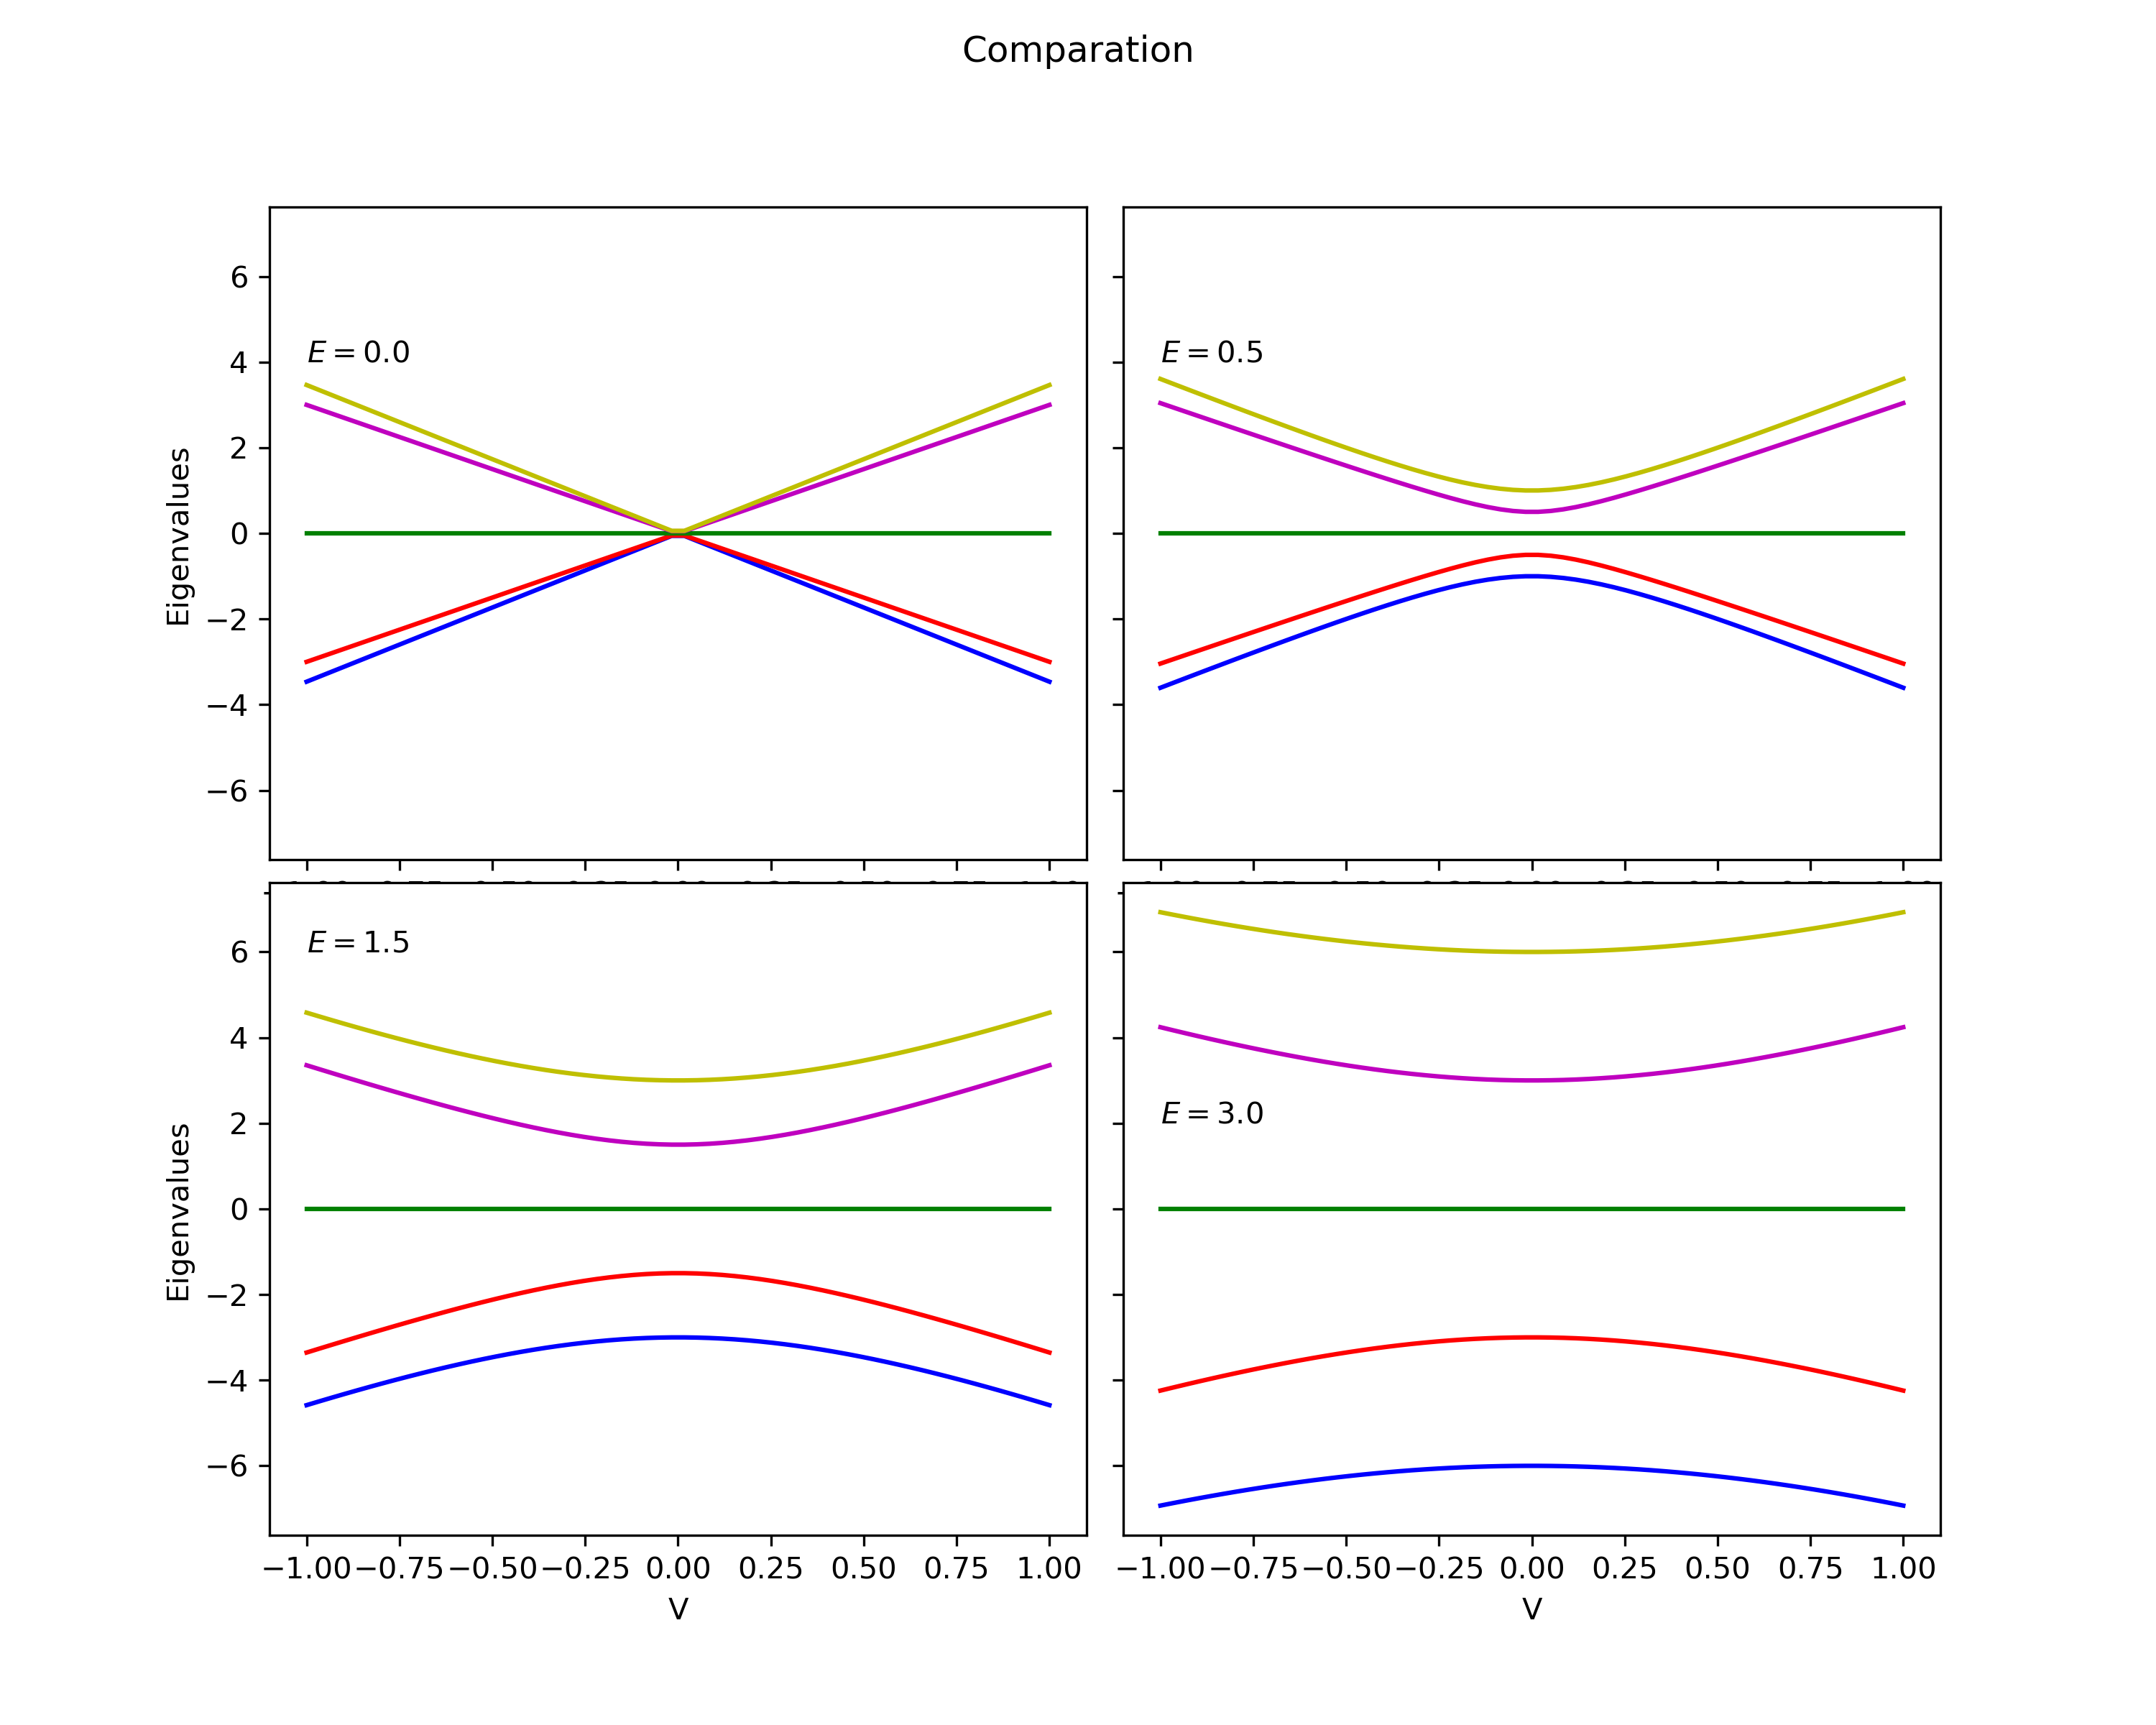

In [6]:
Image('/.../comparation5x5.png', width = 1000)

<span style="color:red">Comment:</span> Similarly to above case, the entanglement depends of how we define $\epsilon$ and the interaction strenght $V$. For example if we decrease the values for $\epsilon$, the entanglement increase. When $\epsilon = 0$, the entenglament reach the maximal point. On the other hand, when we increase the values for $\epsilon$, the entanglement between states disappears.